# NN - Neural nets -NOTE THERE IS AN ERROR WITH FOLDER LENGTH ITS repeatign!!! its not abcde, have a look :)

### Setting up the dataset, (SHOULD BE ONLY RUN ONCE)

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
import glob

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            print ('Characters recognized: ' + str(len(final)))
        return final
    
    def __init__(self):
        print("Extracting characters...")


start_time = time.time()
extract = Extract_Letters()
trainingDirectory = "./ocr/training/"
training_files = glob.glob(f"{trainingDirectory}*.png")

print(len(training_files))
# training_files = ['./ocr/training/training1.png', './ocr/training/training2.png','./ocr/training/training3.png','./ocr/training/training4.png','./ocr/training/training6.png']

folder_string = "абвгдђежзијклљмнњопрстћуфхцчџшабвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
name_counter = 600
for files in training_files:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 71:
            string_counter = 0
        imsave('./training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        
        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

Extracting characters...
8


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


Characters recognized: 24
Characters recognized: 42
Characters recognized: 64
Characters recognized: 72
Characters recognized: 97
Characters recognized: 114
Characters recognized: 134
Characters recognized: 144
Characters recognized: 167
Characters recognized: 186
Characters recognized: 207
Characters recognized: 216
Characters recognized: 240
Characters recognized: 258
Characters recognized: 282
Characters recognized: 288
Characters recognized: 315
Characters recognized: 330
Characters recognized: 351
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Characters recognized: 23
Characters recognized: 30
Characters recognized: 55
Characters recognized: 72
Characters recognized: 92
Characters recognized: 102
Characters recognized: 123
Characters recognized: 144
Characters recognized: 163
Characters recognized: 174
Characters recognized: 196
Characters recognized: 216
Characters recognized: 235
Characters recognized: 246
Characters recognized: 269
Characters recognized: 288
Characters recognized: 308
Characters recognized: 318
Characters recognized: 341
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

Characters recognized: 23
Characters recognized: 42
Characters recognized: 57
Characters recognized: 71
Characters recognized: 72
Characters recognized: 88
Characters recognized: 104
Characters recognized: 114
Characters recognized: 133
Characters recognized: 144
Characters recognized: 165
Characters recognized: 186
Characters recognized: 209
Characters recognized: 216
Characters recognized: 242
Characters recognized: 258
Characters recognized: 276
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Charact

Characters recognized: 20
Characters recognized: 30
Characters recognized: 52
Characters recognized: 72
Characters recognized: 92
Characters recognized: 102
Characters recognized: 125
Characters recognized: 144
Characters recognized: 163
Characters recognized: 174
Characters recognized: 198
Characters recognized: 216
Characters recognized: 232
Characters recognized: 246
Characters recognized: 264
Characters recognized: 284
Characters recognized: 288
Characters recognized: 310
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Characters recognized: 318
Charac

Characters recognized: 19
Characters recognized: 30
Characters recognized: 52
Characters recognized: 72
Characters recognized: 91
Characters recognized: 102
Characters recognized: 123
Characters recognized: 144
Characters recognized: 165
Characters recognized: 174
Characters recognized: 198
Characters recognized: 216
Characters recognized: 237
Characters recognized: 246
Characters recognized: 270
Characters recognized: 288
Characters recognized: 308
Characters recognized: 318
Characters recognized: 340
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

Characters recognized: 21
Characters recognized: 42
Characters recognized: 55
Characters recognized: 68
Characters recognized: 72
Characters recognized: 85
Characters recognized: 98
Characters recognized: 114
Characters recognized: 129
Characters recognized: 144
Characters recognized: 159
Characters recognized: 174
Characters recognized: 186
Characters recognized: 209
Characters recognized: 216
Characters recognized: 242
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characte

Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
C

## Extracting Training Data

In [2]:
## For image recognition
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

##For image analysis
from skimage.io import imread
from skimage.transform import resize

##Library for extracting all images in a directory
import glob
import sys

## CONSTANTS
folder_strings = "абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
smallestNumberOfElementsInEachCollection=sys.maxsize;

def printImage(dataImage,letterArray,index):
    if(len(dataImage.shape)<=2):
        overall=[]
        temp = []
        counter = 0
        for x in range(len(dataImage[index])):
            temp.append(dataImage[index][x])
            counter=counter+1
            if(counter==20):
                overall.append(temp)
                counter=0
                temp=[]
            
        overall=np.asarray(overall)
        plt.imshow(overall, cmap='Greys', vmin=0, vmax=255)
        plt.suptitle(f"Letter: {letterArray[index]}", fontsize=20)
        plt.show()
        print(f"Letter: {letterArray[index]}")
        return
    
    plt.imshow(dataImage[index], cmap='as_gray', vmin=0, vmax=255)
    plt.suptitle(f"Letter: {letterArray[index]}", fontsize=20)
    plt.show()

def printAllImagesInDataSetWithPrediction(dataImage,letterArray,model,printImageToScreen=True,skip=0):
    local=smallestNumberOfElementsInEachCollection
    if(skip>0):
        local=skip
    print(len(dataImage))
    for x in range(0,len(dataImage),local):
        if(printImageToScreen):
            printImage(lettersArray,lettersTarget,x)
        print(f"The Model predicted {model.predict(lettersArray[x].reshape(1,-1))}, actual {lettersTarget[x]}")
        

# This method is vital to ensure that appropraite parsable data is extracted
def generateTrainingDataArray(training_type):
    global lettersTarget
    global smallestNumberOfElementsInEachCollection
    folder_strings = "абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
    lettersTarget=[]
    overallData=[]
    for letter in folder_strings:
        filenames = glob.glob(f"training_type/{letter}/*.png")
        for file in filenames:
            img = imread(file,as_grey=True)
            arr = np.asarray(img)
            arr=arr.flatten()# Make dimension of array a singular arrary(SO normally its 20x20 array into 1d of size 400)
            
            # Converts the image to numbers, then labels in the array letters
            overallData.append(arr)
            lettersTarget.append(letter)
        smallestNumberOfElementsInEachCollection=min(smallestNumberOfElementsInEachCollection,len(filenames))
    return np.asarray(overallData)
            
lettersTarget=[]
lettersArray=generateTrainingDataArray("training_type")
print(f"Finished generating the training dataset, dim of array {lettersArray.shape}")

/home/jeeson/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Finished generating the training dataset, dim of array (2520, 400)


## Extracting Testing Data

Below are the methods for extracting the testing data

In [3]:

## For image recognition
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

##For image analysis
from skimage.io import imread as mainImageRead
from skimage.transform import resize
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize

##Library for extracting all images in a directory
import glob
import re
import string

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 175:##175 MAKES IT IDEAL FOR DATA EXTRACTION!
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            ##print ('Characters recognized: ' + str(len(final)))
        print(f"Totally recognised {len(final)} characters")
        return final
    
    def __init__(self):
        print("Extracting characters...")


################################## Extracting training data #############################################

# Global values
trainingDirectory = "ocr/testing/"
testingCreatedDirectory = "ocr/beingTested/"
testingFileNames=[]

#Get associated testing data
def getTestingDataText(pureFileName):
    ##Method for getting associated text 
    associatedTextLocation = glob.glob(f"{trainingDirectory+pureFileName}*.txt")[0]
    print(associatedTextLocation)
    fileReader = open(associatedTextLocation, 'r')
    textFileArray = fileReader.readlines()
    fileReader.close()
    textFileArray="".join(textFileArray).lower()##Removes new line and makes it lowercase
    textFileArray = textFileArray.replace(" ","").replace("\n","")
    for letter in string.punctuation:
        if(letter!=")" and letter!="("):
            textFileArray = textFileArray.replace(letter,"")
    textFileArray=list(textFileArray)
    return textFileArray

##Generate array of elements into array
def generateTestingDataArray():
    global lettersTestTarget
    global testingFileNames
    extract = Extract_Letters()
    allTestingFiles = glob.glob(f"{trainingDirectory}*.png")
    finalImagesResult=[]
    finalTextResult=[]
    counter = 0
    for fileName in allTestingFiles:
        pureFileName=fileName.replace(".png","").replace(trainingDirectory,"")
        testingText = getTestingDataText(pureFileName) ##Returns the array of strings in the associated text
        lettersTestTarget.append(testingText)
        testingFileNames.append(pureFileName)
        
        extractedImages=extract.extractFile(fileName)
        imageNumericalArray=[]
        for image in extractedImages:
            imsave(f"{testingCreatedDirectory}{counter}.png", image)
            img = mainImageRead(f"{testingCreatedDirectory}{counter}.png",as_grey=True)
            arr = np.asarray(img)
            arr=arr.flatten()# Make dimension of array a singular arrary(SO normally its 20x20 array into 1d of size 400)
            counter=counter+1
            # Converts the image to numbers, then labels in the array letters
            imageNumericalArray.append(arr)
        finalImagesResult.append(np.asarray(imageNumericalArray))
    return np.asarray(finalImagesResult)
        
  
            
lettersTestTarget=[]
lettersTestArray=generateTestingDataArray()


Extracting characters...
ocr/testing/spacex2_ground_truth .txt


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Totally recognised 1825 characters


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


# Training the Neural Network

We need to first alter the data to work with the keras and tensor flow

In [4]:
## Import the appropraite libraries
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

############################# Define methods for manipulating data to fit library###############################
def letterConverter(arr,convert="number"):
    letters = "абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
    alphabetMapper={}
    for letterIndex in range(len(letters)):
        alphabetMapper[letters[letterIndex]] = letterIndex
#     alphabetMapper={"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7,"i":8,"j":9,"k":10,"l":11,"m":12,"n":13,"o":14,"p":15,"q":16,"r":17,"s":18,"t":19,"u":20,"v":21,"w":22,"x":23,"y":24,"z":25,"1":26,"2":27,"3":28,"4":29,"5":30,"6":31,"7":32,"8":33,"9":34,"(":2,")":2,"0":14}
    temp=[]
    for letter in arr:
        if(convert=="number"):
            temp.append(alphabetMapper[letter])
        else:
            for letterAlphabet,alphabetNumber in alphabetMapper.items():
                if(alphabetNumber==letter):
                    temp.append(letterAlphabet)
                    break
    if(convert=="number"):
        return np.asarray(temp)
    return temp


trainTarget=letterConverter(lettersTarget)##Neural net is configured to accept numeric outputs
trainLetter=lettersArray/255##This ensures the neural net accepts values between 0 and 1
print(trainTarget.shape)
print(trainLetter.shape)


Using TensorFlow backend.


(2520,)
(2520, 400)


We now define the strucutre of the model, and save the strucutre of the model

In [5]:
folder_strings="абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
imageDimension=int(len(trainLetter[0]))
sizeOfOutputLayer=len(folder_strings)
print(sizeOfOutputLayer)

#############################Defining the structure of the model #########################

# ## Building the model, with  3 total layers, and 2 hidden layers with 64 neurons each,
# ## The activation function being used is the relu function
# # The output layer has 10 neurons as the output since 10 digits, using softmax
model = Sequential()
model.add(Dense(64,activation="relu",input_dim=imageDimension))##Note we only provide the input dim here since this is first layer
model.add(Dense(64,activation="relu"))
model.add(Dense(sizeOfOutputLayer,activation="softmax"))##Remember 10 for number of output vlaues


################################ Saving the model strucutre ###############################################

##The loss function measure the error of the function
## The optimizer is responsible for tryign to correct the errors present
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])


42


We train the model, to the training dataset

In [6]:
##Train the model
#Note hte to_categoricl converts the number say 2 into [0,0,1,0,0,0,0,0,0,0]. Since it reflects what the final output layer should look like
##And we have currently defined the output layer to have 10 numbers, as such the output length is that long
model.fit(trainLetter,
         to_categorical(trainTarget),
          epochs=10,#How many times the model should adjust its weights on the dataset to train on
          batch_size=32 #Represents the number of samples per gradient update for the training
         )

Epoch 1/10
2520/2520 [==============================] - 1s 505us/step - loss: 2.9040 - accuracy: 0.3571
Epoch 2/10
2520/2520 [==============================] - 1s 252us/step - loss: 1.5550 - accuracy: 0.6337
Epoch 3/10
2520/2520 [==============================] - 1s 255us/step - loss: 1.0996 - accuracy: 0.6730
Epoch 4/10
2520/2520 [==============================] - 1s 205us/step - loss: 0.8959 - accuracy: 0.6881
Epoch 5/10
2520/2520 [==============================] - 0s 196us/step - loss: 0.8353 - accuracy: 0.6750
Epoch 6/10
2520/2520 [==============================] - 0s 161us/step - loss: 0.7515 - accuracy: 0.6952
Epoch 7/10
2520/2520 [==============================] - 0s 145us/step - loss: 0.7085 - accuracy: 0.7036
Epoch 8/10
2520/2520 [==============================] - 0s 135us/step - loss: 0.6888 - accuracy: 0.7048
Epoch 9/10
2520/2520 [==============================] - 0s 162us/step - loss: 0.6586 - accuracy: 0.7147
Epoch 10/10
2520/2520 [==============================] - 0s 155u

#### Methods for calulcating metrics :)

In [7]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Remember that printmd is just but cooler looking :)
from sklearn import metrics
import seaborn as sn
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_predict

def printConfusionMatrixToScreen(confusionMatrix):
    print("As pure print")
    for x in range(len(confusionMatrix)):
        print("[",end="")
        for y in range(len(confusionMatrix[x])):
            print(f"|{confusionMatrix[x][y]}|",end="")
        print("]")
      
      
def plotConfusionMatrix(prediction,target,fileName):
    confusionMatrix=confusion_matrix(target,prediction)
    df_cm = pd.DataFrame(confusionMatrix, index = [i for i in range(len(confusionMatrix[0]))],
                  columns = [i for i in range(len(confusionMatrix[0]))])
    plt.figure(figsize = (24,14))
    plt.suptitle(f"{fileName[0].upper()+fileName[1:]} Confusion Matrix", fontsize=50)
    sn.heatmap(df_cm, annot=True)
    plt.show()
    ##printConfusionMatrixToScreen(confusionMatrix)

    
def calculateAccuracyMetrics(prediction,target):
    printmd(f"**Accuracy:** {metrics.accuracy_score(target,prediction)}\n")
    printmd(f"**Precision:** {precision_score(target, prediction,average='weighted',zero_division=1)}")
    printmd(f"**Recall:** {recall_score(target, prediction,average='weighted')}")
    printmd(f"**F1 score:** {f1_score(target, prediction,average='weighted')}")


## Calculate Appropriate Metrics

**Accuracy:** 0.8054794520547945


**Precision:** 0.8370933633148375

/home/jeeson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Recall:** 0.8054794520547945

**F1 score:** 0.7978024629717505

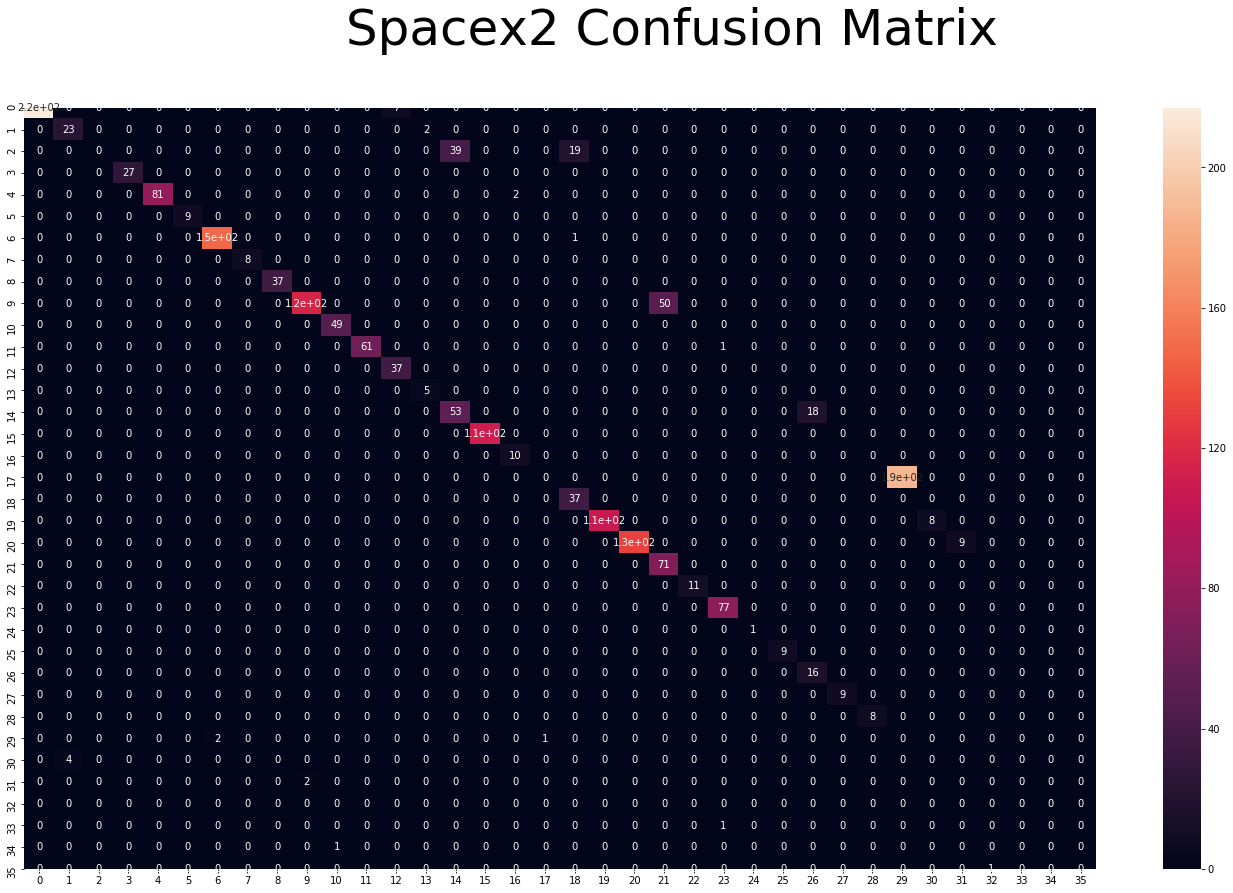

In [8]:
##Below method makes a prediction for the given test data:

for targetTestIndex in range(len(lettersTestTarget)):
    targetLetters=letterConverter(lettersTestTarget[targetTestIndex])
    lettersTestArrayfinal=lettersTestArray[targetTestIndex]##/255TUrns out id doesnt really affect/255#Normalize to neural net size
    predictions = model.predict(lettersTestArrayfinal)
    predictions = np.argmax(predictions, axis=1) ## Converting predictions to manipulatable format

    # Differnet Evaluation Metrics
    calculateAccuracyMetrics(predictions,targetLetters)
    plotConfusionMatrix(predictions,targetLetters,testingFileNames[targetTestIndex])